In [69]:
import os, sys, email
import numpy as np 
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns; 
sns.set_style('whitegrid')

import wordcloud

import networkx as nx
from nltk.tokenize.regexp import RegexpTokenizer

from subprocess import check_output
print(check_output(["ls", "/Users/vishnoiprem/Udemy/kaggle/Enron"]).decode("utf8"))

Enron.ipynb
emails.csv



# 1.loading and cleansing data

In [70]:
#emails_df = pd.read_csv('../input/emails.csv')
emails_df = pd.read_csv('/Users/vishnoiprem/Udemy/kaggle/Enron/emails.csv')
print(emails_df.shape)
emails_df.head()

(517401, 2)


file                                            message
0     allen-p/_sent_mail/1.  Message-ID: <18782981.1075855378110.JavaMail.e...
1    allen-p/_sent_mail/10.  Message-ID: <15464986.1075855378456.JavaMail.e...
2   allen-p/_sent_mail/100.  Message-ID: <24216240.1075855687451.JavaMail.e...
3  allen-p/_sent_mail/1000.  Message-ID: <13505866.1075863688222.JavaMail.e...
4  allen-p/_sent_mail/1001.  Message-ID: <30922949.1075863688243.JavaMail.e...

In [71]:
print(emails_df['message'][0])


Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>
Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.belden@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Belden <Tim Belden/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Here is our forecast

 


In [72]:
emails_df = pd.read_csv('/Users/vishnoiprem/Udemy/kaggle/Enron/emails.csv').head(10000)



In [73]:

def get_text_from_email(msg):
    '''To get the content from email objects'''
    parts = []
    for part in msg.walk():
        if part.get_content_type() == 'text/plain':
            parts.append( part.get_payload() )
    return ''.join(parts)

def split_email_addresses(line):
    '''To separate multiple email addresses'''
    if line:
        addrs = line.split(',')
        addrs = frozenset(map(lambda x: x.strip(), addrs))
    else:
        addrs = None
    return addrs


In [76]:
# Parse the emails into a list email objects
messages = list(map(email.message_from_string, emails_df['message']))
for i in range(1):
    print(messages[i])

Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>
Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.belden@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Belden <Tim Belden/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Here is our forecast

 


In [77]:
emails_df.drop('message', axis=1, inplace=True)
emails_df.head(1)

file
0  allen-p/_sent_mail/1.

In [80]:
keys = messages[0].keys()
print(keys)

['Message-ID', 'Date', 'From', 'To', 'Subject', 'Mime-Version', 'Content-Type', 'Content-Transfer-Encoding', 'X-From', 'X-To', 'X-cc', 'X-bcc', 'X-Folder', 'X-Origin', 'X-FileName']


In [81]:
for key in keys:
    emails_df[key] = [doc[key] for doc in messages]
# Parse content from emails

In [82]:
emails_df.head()

file                                     Message-ID  \
0     allen-p/_sent_mail/1.  <18782981.1075855378110.JavaMail.evans@thyme>   
1    allen-p/_sent_mail/10.  <15464986.1075855378456.JavaMail.evans@thyme>   
2   allen-p/_sent_mail/100.  <24216240.1075855687451.JavaMail.evans@thyme>   
3  allen-p/_sent_mail/1000.  <13505866.1075863688222.JavaMail.evans@thyme>   
4  allen-p/_sent_mail/1001.  <30922949.1075863688243.JavaMail.evans@thyme>   

                                    Date                     From  \
0  Mon, 14 May 2001 16:39:00 -0700 (PDT)  phillip.allen@enron.com   
1   Fri, 4 May 2001 13:51:00 -0700 (PDT)  phillip.allen@enron.com   
2  Wed, 18 Oct 2000 03:00:00 -0700 (PDT)  phillip.allen@enron.com   
3  Mon, 23 Oct 2000 06:13:00 -0700 (PDT)  phillip.allen@enron.com   
4  Thu, 31 Aug 2000 05:07:00 -0700 (PDT)  phillip.allen@enron.com   

                        To    Subject Mime-Version  \
0     tim.belden@enron.com                     1.0   
1  john.lavorato@enron.com        Re:          1.0   
2   leah.arsdall@enron.com   Re: test          1.0   
3    randall.gay@enron.com                     1.0   
4     greg.piper@enron.com  Re: Hello          1.0   

                   Content-Type Content-Transfer-Encoding           X-From  \
0  text/plain; charset=us-ascii                      7bit  Phillip K Allen   
1  text/plain; charset=us-ascii                      7bit  Phillip K Allen   
2  text/plain; charset=us-ascii                      7bit  Phillip K Allen   
3  text/plain; charset=us-ascii                      7bit  Phillip K Allen   
4  text/plain; charset=us-ascii                      7bit  Phillip K Allen   

                                                X-To X-cc X-bcc  \
0           Tim Belden <Tim Belden/Enron@EnronXGate>              
1  John J Lavorato <John J Lavorato/ENRON@enronXg...              
2                                   Leah Van Arsdall              
3                                      Randall L Gay              
4                                         Greg Piper              

                                            X-Folder X-Origin  \
0  \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...  Allen-P   
1  \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...  Allen-P   
2    \Phillip_Allen_Dec2000\Notes Folders\'sent mail  Allen-P   
3    \Phillip_Allen_Dec2000\Notes Folders\'sent mail  Allen-P   
4    \Phillip_Allen_Dec2000\Notes Folders\'sent mail  Allen-P   

                    X-FileName  
0  pallen (Non-Privileged).pst  
1  pallen (Non-Privileged).pst  
2                   pallen.nsf  
3                   pallen.nsf  
4                   pallen.nsf

In [83]:
# Parse content from emails
emails_df['content'] = list(map(get_text_from_email, messages))
# Split multiple email addresses
emails_df['From'] = emails_df['From'].map(split_email_addresses)
emails_df['To'] = emails_df['To'].map(split_email_addresses)

# Extract the root of 'file' as 'user'
emails_df['user'] = emails_df['file'].map(lambda x:x.split('/')[0])
del messages

emails_df.head()

file                                     Message-ID  \
0     allen-p/_sent_mail/1.  <18782981.1075855378110.JavaMail.evans@thyme>   
1    allen-p/_sent_mail/10.  <15464986.1075855378456.JavaMail.evans@thyme>   
2   allen-p/_sent_mail/100.  <24216240.1075855687451.JavaMail.evans@thyme>   
3  allen-p/_sent_mail/1000.  <13505866.1075863688222.JavaMail.evans@thyme>   
4  allen-p/_sent_mail/1001.  <30922949.1075863688243.JavaMail.evans@thyme>   

                                    Date                       From  \
0  Mon, 14 May 2001 16:39:00 -0700 (PDT)  (phillip.allen@enron.com)   
1   Fri, 4 May 2001 13:51:00 -0700 (PDT)  (phillip.allen@enron.com)   
2  Wed, 18 Oct 2000 03:00:00 -0700 (PDT)  (phillip.allen@enron.com)   
3  Mon, 23 Oct 2000 06:13:00 -0700 (PDT)  (phillip.allen@enron.com)   
4  Thu, 31 Aug 2000 05:07:00 -0700 (PDT)  (phillip.allen@enron.com)   

                          To    Subject Mime-Version  \
0     (tim.belden@enron.com)                     1.0   
1  (john.lavorato@enron.com)        Re:          1.0   
2   (leah.arsdall@enron.com)   Re: test          1.0   
3    (randall.gay@enron.com)                     1.0   
4     (greg.piper@enron.com)  Re: Hello          1.0   

                   Content-Type Content-Transfer-Encoding           X-From  \
0  text/plain; charset=us-ascii                      7bit  Phillip K Allen   
1  text/plain; charset=us-ascii                      7bit  Phillip K Allen   
2  text/plain; charset=us-ascii                      7bit  Phillip K Allen   
3  text/plain; charset=us-ascii                      7bit  Phillip K Allen   
4  text/plain; charset=us-ascii                      7bit  Phillip K Allen   

                                                X-To X-cc X-bcc  \
0           Tim Belden <Tim Belden/Enron@EnronXGate>              
1  John J Lavorato <John J Lavorato/ENRON@enronXg...              
2                                   Leah Van Arsdall              
3                                      Randall L Gay              
4                                         Greg Piper              

                                            X-Folder X-Origin  \
0  \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...  Allen-P   
1  \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...  Allen-P   
2    \Phillip_Allen_Dec2000\Notes Folders\'sent mail  Allen-P   
3    \Phillip_Allen_Dec2000\Notes Folders\'sent mail  Allen-P   
4    \Phillip_Allen_Dec2000\Notes Folders\'sent mail  Allen-P   

                    X-FileName  \
0  pallen (Non-Privileged).pst   
1  pallen (Non-Privileged).pst   
2                   pallen.nsf   
3                   pallen.nsf   
4                   pallen.nsf   

                                             content     user  
0                          Here is our forecast\n\n   allen-p  
1  Traveling to have a business meeting takes the...  allen-p  
2                     test successful.  way to go!!!  allen-p  
3  Randy,\n\n Can you send me a schedule of the s...  allen-p  
4                Let's shoot for Tuesday at 11:45.    allen-p

In [84]:
print('shape of the dataframe:', emails_df.shape)
# Find number of unique values in each columns

shape of the dataframe: (10000, 18)


In [85]:
for col in emails_df.columns:
    print(col, emails_df[col].nunique())

file 10000
Message-ID 10000
Date 5222
From 754
To 1295
Subject 3181
Mime-Version 1
Content-Type 2
Content-Transfer-Encoding 2
X-From 918
X-To 1741
X-cc 421
X-bcc 2
X-Folder 125
X-Origin 10
X-FileName 17
content 5271
user 6


In [86]:
# Set index and drop columns with two few values
emails_df = emails_df.set_index('Message-ID')\
.drop(['file', 'Mime-Version', 'Content-Type', 'Content-Transfer-Encoding'], axis=1)
# Parse datetime
emails_df['Date'] = pd.to_datetime(emails_df['Date'], infer_datetime_format=True)
emails_df.dtypes

Date          datetime64[ns]
From                  object
To                    object
Subject               object
X-From                object
X-To                  object
X-cc                  object
X-bcc                 object
X-Folder              object
X-Origin              object
X-FileName            object
content               object
user                  object
dtype: object

In [87]:
emails_df.head()

Date  \
Message-ID                                                          
<18782981.1075855378110.JavaMail.evans@thyme> 2001-05-14 23:39:00   
<15464986.1075855378456.JavaMail.evans@thyme> 2001-05-04 20:51:00   
<24216240.1075855687451.JavaMail.evans@thyme> 2000-10-18 10:00:00   
<13505866.1075863688222.JavaMail.evans@thyme> 2000-10-23 13:13:00   
<30922949.1075863688243.JavaMail.evans@thyme> 2000-08-31 12:07:00   

                                                                    From  \
Message-ID                                                                 
<18782981.1075855378110.JavaMail.evans@thyme>  (phillip.allen@enron.com)   
<15464986.1075855378456.JavaMail.evans@thyme>  (phillip.allen@enron.com)   
<24216240.1075855687451.JavaMail.evans@thyme>  (phillip.allen@enron.com)   
<13505866.1075863688222.JavaMail.evans@thyme>  (phillip.allen@enron.com)   
<30922949.1075863688243.JavaMail.evans@thyme>  (phillip.allen@enron.com)   

                                                                      To  \
Message-ID                                                                 
<18782981.1075855378110.JavaMail.evans@thyme>     (tim.belden@enron.com)   
<15464986.1075855378456.JavaMail.evans@thyme>  (john.lavorato@enron.com)   
<24216240.1075855687451.JavaMail.evans@thyme>   (leah.arsdall@enron.com)   
<13505866.1075863688222.JavaMail.evans@thyme>    (randall.gay@enron.com)   
<30922949.1075863688243.JavaMail.evans@thyme>     (greg.piper@enron.com)   

                                                 Subject           X-From  \
Message-ID                                                                  
<18782981.1075855378110.JavaMail.evans@thyme>             Phillip K Allen   
<15464986.1075855378456.JavaMail.evans@thyme>        Re:  Phillip K Allen   
<24216240.1075855687451.JavaMail.evans@thyme>   Re: test  Phillip K Allen   
<13505866.1075863688222.JavaMail.evans@thyme>             Phillip K Allen   
<30922949.1075863688243.JavaMail.evans@thyme>  Re: Hello  Phillip K Allen   

                                                                                            X-To  \
Message-ID                                                                                         
<18782981.1075855378110.JavaMail.evans@thyme>           Tim Belden <Tim Belden/Enron@EnronXGate>   
<15464986.1075855378456.JavaMail.evans@thyme>  John J Lavorato <John J Lavorato/ENRON@enronXg...   
<24216240.1075855687451.JavaMail.evans@thyme>                                   Leah Van Arsdall   
<13505866.1075863688222.JavaMail.evans@thyme>                                      Randall L Gay   
<30922949.1075863688243.JavaMail.evans@thyme>                                         Greg Piper   

                                              X-cc X-bcc  \
Message-ID                                                 
<18782981.1075855378110.JavaMail.evans@thyme>              
<15464986.1075855378456.JavaMail.evans@thyme>              
<24216240.1075855687451.JavaMail.evans@thyme>              
<13505866.1075863688222.JavaMail.evans@thyme>              
<30922949.1075863688243.JavaMail.evans@thyme>              

                                                                                        X-Folder  \
Message-ID                                                                                         
<18782981.1075855378110.JavaMail.evans@thyme>  \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...   
<15464986.1075855378456.JavaMail.evans@thyme>  \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...   
<24216240.1075855687451.JavaMail.evans@thyme>    \Phillip_Allen_Dec2000\Notes Folders\'sent mail   
<13505866.1075863688222.JavaMail.evans@thyme>    \Phillip_Allen_Dec2000\Notes Folders\'sent mail   
<30922949.1075863688243.JavaMail.evans@thyme>    \Phillip_Allen_Dec2000\Notes Folders\'sent mail   

                                              X-Origin  \
Message-ID                                               
<18782981.1075855378110.JavaMail

# 2. Exploratory analyses



In [88]:
ax = emails_df.groupby(emails_df['Date'].dt.year)['content'].count()
print(ax)

Date
1980      20
1999       8
2000    4110
2001    5471
2002     391
Name: content, dtype: int64


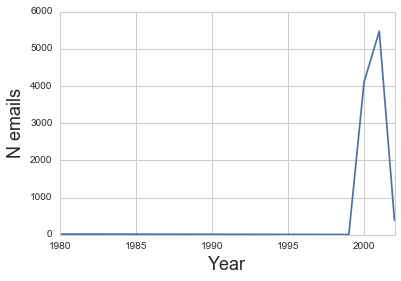

In [89]:

ax = emails_df.groupby(emails_df['Date'].dt.year)['content'].count().plot()
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('N emails', fontsize=18)

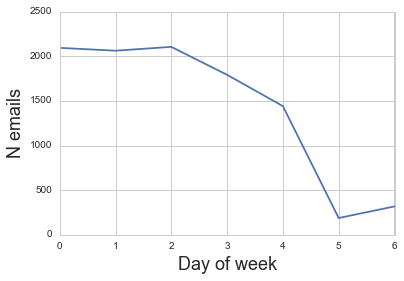

In [90]:
ax = emails_df.groupby(emails_df['Date'].dt.dayofweek)['content'].count().plot()
ax.set_xlabel('Day of week', fontsize=18)
ax.set_ylabel('N emails', fontsize=18)

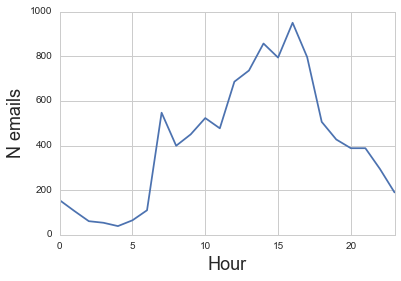

In [91]:
ax = emails_df.groupby(emails_df['Date'].dt.hour)['content'].count().plot()
ax.set_xlabel('Hour', fontsize=18)
ax.set_ylabel('N emails', fontsize=18)

# Who sends most emails


In [92]:
# Count words in Subjects and content
tokenizer = RegexpTokenizer(r'(?u)\b\w\w+\b')
emails_df['subject_wc'] = emails_df['Subject'].map(lambda x: len(tokenizer.tokenize(x)))
emails_df['content_wc'] = emails_df['content'].map(lambda x: len(tokenizer.tokenize(x)))

In [93]:
emails_df.head()

Date  \
Message-ID                                                          
<18782981.1075855378110.JavaMail.evans@thyme> 2001-05-14 23:39:00   
<15464986.1075855378456.JavaMail.evans@thyme> 2001-05-04 20:51:00   
<24216240.1075855687451.JavaMail.evans@thyme> 2000-10-18 10:00:00   
<13505866.1075863688222.JavaMail.evans@thyme> 2000-10-23 13:13:00   
<30922949.1075863688243.JavaMail.evans@thyme> 2000-08-31 12:07:00   

                                                                    From  \
Message-ID                                                                 
<18782981.1075855378110.JavaMail.evans@thyme>  (phillip.allen@enron.com)   
<15464986.1075855378456.JavaMail.evans@thyme>  (phillip.allen@enron.com)   
<24216240.1075855687451.JavaMail.evans@thyme>  (phillip.allen@enron.com)   
<13505866.1075863688222.JavaMail.evans@thyme>  (phillip.allen@enron.com)   
<30922949.1075863688243.JavaMail.evans@thyme>  (phillip.allen@enron.com)   

                                                                      To  \
Message-ID                                                                 
<18782981.1075855378110.JavaMail.evans@thyme>     (tim.belden@enron.com)   
<15464986.1075855378456.JavaMail.evans@thyme>  (john.lavorato@enron.com)   
<24216240.1075855687451.JavaMail.evans@thyme>   (leah.arsdall@enron.com)   
<13505866.1075863688222.JavaMail.evans@thyme>    (randall.gay@enron.com)   
<30922949.1075863688243.JavaMail.evans@thyme>     (greg.piper@enron.com)   

                                                 Subject           X-From  \
Message-ID                                                                  
<18782981.1075855378110.JavaMail.evans@thyme>             Phillip K Allen   
<15464986.1075855378456.JavaMail.evans@thyme>        Re:  Phillip K Allen   
<24216240.1075855687451.JavaMail.evans@thyme>   Re: test  Phillip K Allen   
<13505866.1075863688222.JavaMail.evans@thyme>             Phillip K Allen   
<30922949.1075863688243.JavaMail.evans@thyme>  Re: Hello  Phillip K Allen   

                                                                                            X-To  \
Message-ID                                                                                         
<18782981.1075855378110.JavaMail.evans@thyme>           Tim Belden <Tim Belden/Enron@EnronXGate>   
<15464986.1075855378456.JavaMail.evans@thyme>  John J Lavorato <John J Lavorato/ENRON@enronXg...   
<24216240.1075855687451.JavaMail.evans@thyme>                                   Leah Van Arsdall   
<13505866.1075863688222.JavaMail.evans@thyme>                                      Randall L Gay   
<30922949.1075863688243.JavaMail.evans@thyme>                                         Greg Piper   

                                              X-cc X-bcc  \
Message-ID                                                 
<18782981.1075855378110.JavaMail.evans@thyme>              
<15464986.1075855378456.JavaMail.evans@thyme>              
<24216240.1075855687451.JavaMail.evans@thyme>              
<13505866.1075863688222.JavaMail.evans@thyme>              
<30922949.1075863688243.JavaMail.evans@thyme>              

                                                                                        X-Folder  \
Message-ID                                                                                         
<18782981.1075855378110.JavaMail.evans@thyme>  \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...   
<15464986.1075855378456.JavaMail.evans@thyme>  \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...   
<24216240.1075855687451.JavaMail.evans@thyme>    \Phillip_Allen_Dec2000\Notes Folders\'sent mail   
<13505866.1075863688222.JavaMail.evans@thyme>    \Phillip_Allen_Dec2000\Notes Folders\'sent mail   
<30922949.1075863688243.JavaMail.evans@thyme>    \Phillip_Allen_Dec2000\Notes Folders\'sent mail   

                                              X-Origin  \
Message-ID                                               
<18782981.1075855378110.JavaMail

In [94]:
grouped_by_people = emails_df.groupby('user').agg({
        'content': 'count', 
        'subject_wc': 'mean',
        'content_wc': 'mean',
    })
grouped_by_people.rename(columns={'content': 'N emails', 
                                  'subject_wc': 'Subject word count', 
                                  'content_wc': 'Content word count'}, inplace=True)
grouped_by_people.sort('N emails', ascending=False).head()

/Users/vishnoiprem/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Subject word count  N emails  Content word count
user                                                      
arnold-j            3.261127      4898          266.268885
allen-p             3.383652      3034          178.506262
badeer-r            6.060433       877          264.281642
arora-h             4.836391       654          340.730887
bailey-s            4.587866       478          162.587866

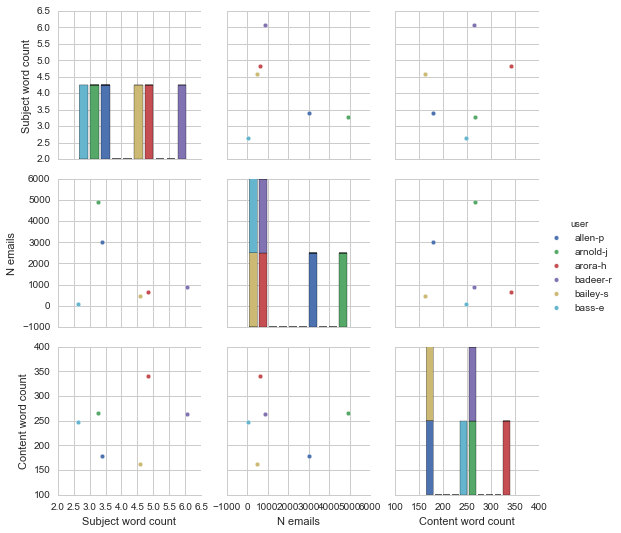

In [95]:
sns.pairplot(grouped_by_people.reset_index(), hue='user')

# Social network analyses of email senders and recipients Let's see who sends the most emails to whom First we'll only look at emails sent to single email address, which may be more important personal communications

In [96]:
sub_df = emails_df[['From', 'To', 'Date']].dropna()
print(sub_df.shape)
# drop emails sending to multiple addresses
sub_df = sub_df.loc[sub_df['To'].map(len) == 1]
print(sub_df.shape)

(9671, 3)
(8414, 3)


In [97]:
sub_df = sub_df.groupby(['From', 'To']).count().reset_index()
# Unpack frozensets
sub_df['From'] = sub_df['From'].map(lambda x: next(iter(x)))
sub_df['To'] = sub_df['To'].map(lambda x: next(iter(x)))
# rename column
sub_df.rename(columns={'Date': 'count'}, inplace=True)
sub_df.sort('count', ascending=False).head(10)

/Users/vishnoiprem/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


From                          To  count
952     john.arnold@enron.com        ina.rangel@enron.com    219
1066    john.arnold@enron.com   jennifer.fraser@enron.com    197
1093    john.arnold@enron.com     slafontaine@globalp.com    177
107   phillip.allen@enron.com  stagecoachmama@hotmail.com    153
1079    john.arnold@enron.com    margaret.allen@enron.com    150
949     john.arnold@enron.com     john.lavorato@enron.com    142
111   phillip.allen@enron.com        ina.rangel@enron.com    137
1061    john.arnold@enron.com        mike.maggi@enron.com    133
98    phillip.allen@enron.com         jsmith@austintx.com    124
1048    john.arnold@enron.com        epao@mba2002.hbs.edu    118

In [98]:

# Make a network of email sender and receipients
G = nx.from_pandas_dataframe(sub_df, 'From', 'To', edge_attr='count', create_using=nx.DiGraph())
print('Number of nodes: %d, Number of edges: %d' % (G.number_of_nodes(), G.number_of_edges()))

Number of nodes: 1198, Number of edges: 1504


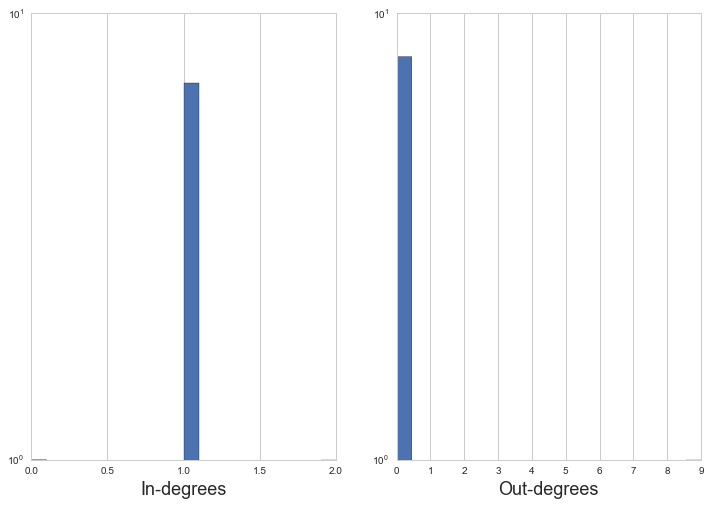

In [64]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 8))
ax1.hist(list(G.in_degree(weight='count').values()), log=True, bins=20)
ax1.set_xlabel('In-degrees', fontsize=18)

ax2.hist(list(G.out_degree(weight='count').values()), log=True, bins=20)
ax2.set_xlabel('Out-degrees', fontsize=18)

# Examine connected components in the network


(0.1, 10000.0)

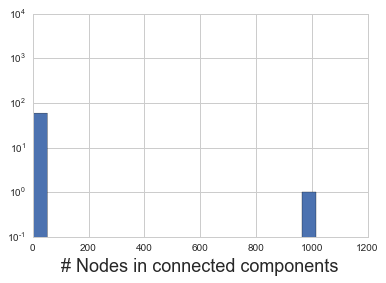

In [99]:
n_nodes_in_cc = []
for nodes in nx.connected_components(G.to_undirected()):
    n_nodes_in_cc.append(len(nodes))

plt.hist(n_nodes_in_cc, bins=20, log=True)
plt.xlabel('# Nodes in connected components', fontsize=18)
plt.ylim([.1,1e4])

# What do the emails say?Â¶
In the subjects:

(-0.5, 799.5, 599.5, -0.5)

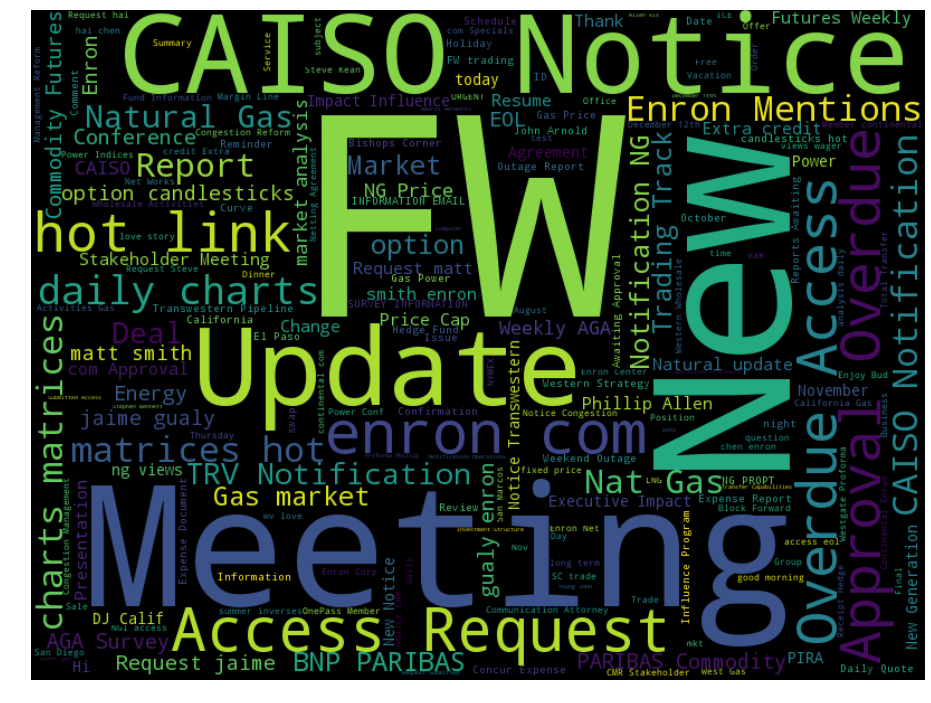

In [100]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

subjects = ' '.join(emails_df['Subject'])
fig, ax = plt.subplots(figsize=(16, 12))
wc = wordcloud.WordCloud(width=800, 
                         height=600, 
                         max_words=200,
                         stopwords=ENGLISH_STOP_WORDS).generate(subjects)
ax.imshow(wc)
ax.axis("off")

# In the contents:


(-0.5, 799.5, 599.5, -0.5)

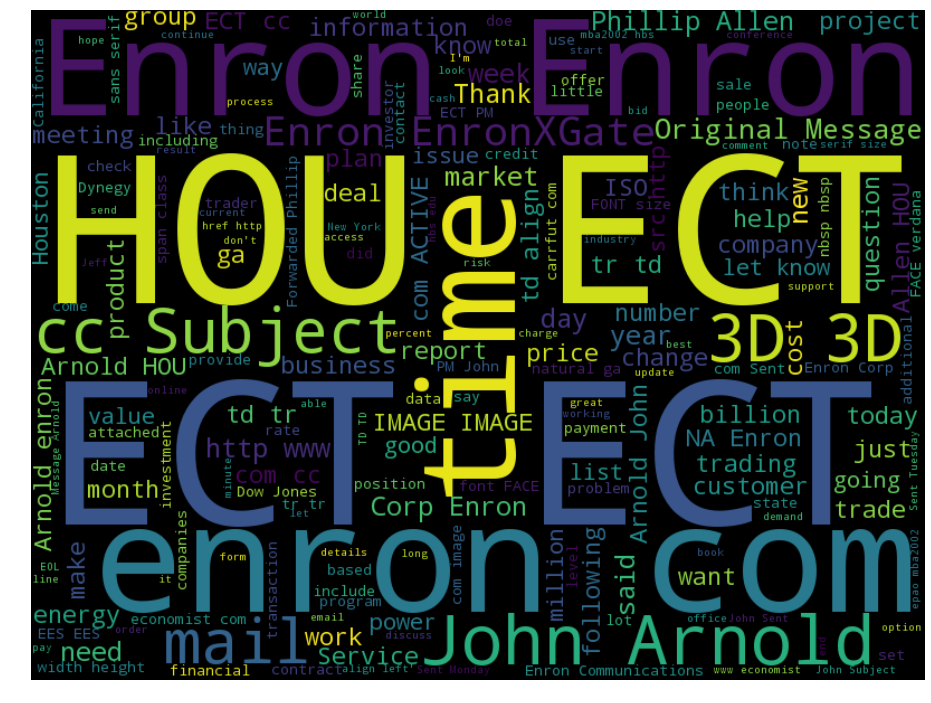

In [101]:
contents = ' '.join(emails_df.sample(1000)['content'])
fig, ax = plt.subplots(figsize=(16, 12))
wc = wordcloud.WordCloud(width=800, 
                         height=600, 
                         max_words=200,
                         stopwords=ENGLISH_STOP_WORDS).generate(contents)
ax.imshow(wc)
ax.axis("off")
